# Feature Selection Results
After running recursive feature extraction in used_cars_feat_select.py, the results are analysed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib

In [2]:
sb.set_theme()

File is too large size to be uploaded to GitHub.

In [3]:
with open("../Output/rfe_results/rfe_results_36_medium.joblib", "rb") as f:
    rfe_results = joblib.load(f)

Plotting `n_features` vs `r2_score`.

In [4]:
rfe_scores = pd.DataFrame({
    "n_features": [n_features for n_features, _, _ in rfe_results],
    "r2_score": [score for _, score, _ in rfe_results],
})

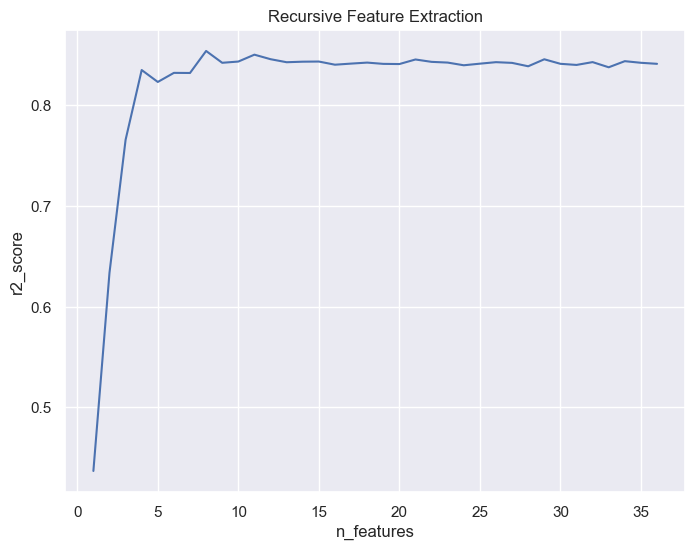

In [5]:
sb.set_theme("notebook", "darkgrid", font_scale=1, 
             rc={"lines.linewidth": 1.5, "figure.figsize": (8, 6)})
ax = sb.lineplot(rfe_scores, x="n_features", y="r2_score").set_title("Recursive Feature Extraction")
# ax.set_ylim(0.85)
plt.show()

Extracting features used for each RFE-s.

In [6]:
rfe_allfeats = [
    (n, score, [
        feat for rank, feat in list(zip(rfe.ranking_, rfe.feature_names_in_)) 
        if rank == 1
    ]) for n, score, rfe in rfe_results
]

In [7]:
rfe_allfeats_sorted = sorted(rfe_allfeats, key=lambda x: x[1], reverse=True)

In [8]:
for n, score, feats in rfe_allfeats:
    print(f"{n}: {score}\n\t{feats}")

1: 0.43702765345793215
	['pca_engine_1']
2: 0.6336912596371551
	['pca_engine_1', 'pca_car_usage_1']
3: 0.765585593071412
	['powerRPM', 'pca_engine_1', 'pca_car_usage_1']
4: 0.8347894913602959
	['powerRPM', 'pca_engine_1', 'pca_car_usage_1', 'franchise_make_encoded_1']
5: 0.82295608482204
	['powerRPM', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1']
6: 0.8319761143136901
	['powerRPM', 'torqueRPM', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1']
7: 0.8318617187337534
	['powerRPM', 'torqueRPM', 'pca_fuel_economy_1', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1']
8: 0.8537016504855461
	['powerRPM', 'savings_amount', 'torqueRPM', 'pca_fuel_economy_1', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1']
9: 0.8419695195869226
	['powerRPM', 'savings_amount', 'torqueRPM', 'pca_fuel_economy_1', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1',

In [25]:
print("Number of features: \t{}\nR2 Score: \t\t{}\nColumns/Features: \t{}"
      .format(*rfe_allfeats_sorted[0]))

Number of features: 	8
R2 Score: 		0.8537016504855461
Columns/Features: 	['powerRPM', 'savings_amount', 'torqueRPM', 'pca_fuel_economy_1', 'pca_engine_1', 'pca_car_usage_1', 'avg_car_space', 'franchise_make_encoded_1']
